In [42]:
import pandas as pd
import numpy as np
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df=pd.read_csv(path)

In [43]:
df.to_csv('module_5_auto.csv')

In [44]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [45]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [46]:
y_data = df['price']

In [47]:
x_data = df.drop('price', axis=1)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state=1)
x_test.shape, x_train.shape

((31, 20), (170, 20))

In [49]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
x_train_1.shape, x_test_1.shape

((120, 20), (81, 20))

In [11]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [13]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

In [14]:
x_train2,x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
x_train2.shape, x_test2.shape

((180, 20), (21, 20))

In [16]:
lre.fit(x_train2[['horsepower']], y_train2)
lre.score(x_test2[['horsepower']], y_test2)

0.7340722810055448

# cross validation

In [21]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [22]:
Rcross.mean()

0.522009915042119

In [23]:
Rcross.std()

0.2911839444756029

In [26]:
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross1

array([0.59015621, 0.44319613])

In [27]:
Rcorss1.mean(), Rcross1.std()

(0.5166761697127429, 0.07348004195771388)

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [39]:
from sklearn.linear_model import LinearRegression

In [52]:
lm3 = LinearRegression()

In [53]:
Rcross2 = cross_val_score(lm3, x_data[['horsepower']], y_data, cv=2)
Rcross2

array([0.59015621, 0.44319613])

In [54]:
Rcross2.mean()

0.5166761697127429

# Overfitting

In [55]:
lr = LinearRegression()

In [58]:
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [63]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

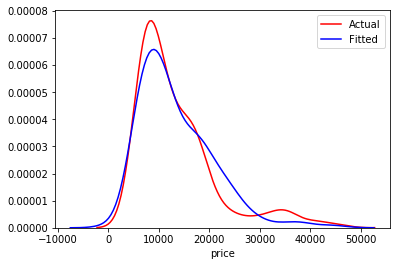

In [66]:
ax2= sns.distplot(y_train, hist=False, color='r',label='Actual')
sns.distplot(yhat_train, hist=False, color='b',label='Fitted',ax=ax2)

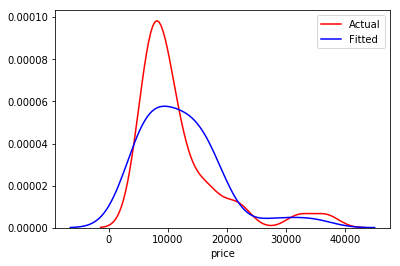

In [65]:
ax1= sns.distplot(y_test, hist=False, color='r',label='Actual')
sns.distplot(yhat_test, hist=False, color='b',label='Fitted',ax=ax1)

# Polynomial

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [70]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [71]:
Poly = LinearRegression()
Poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
yhat = Poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77492727,  7308.09738048, 12213.83912148, 18893.06269972,
       19995.73316497])

In [76]:
y_test[0:4].values

array([ 6295., 10698., 13860., 13499.])

In [78]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

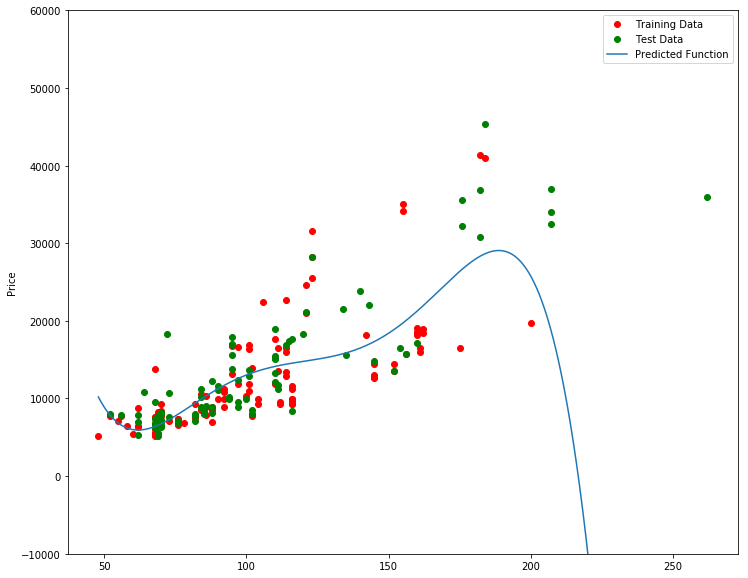

In [80]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, Poly,pr)

In [81]:
Poly.score(x_test_pr, y_test)

-29.871838229908324

Text(3, 0.75, 'Maximum R^2 ')

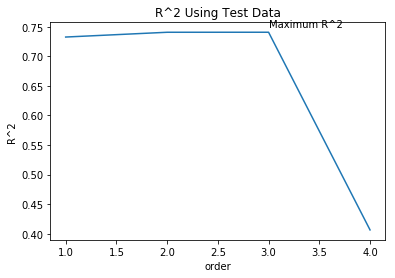

In [82]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  

In [85]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [86]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

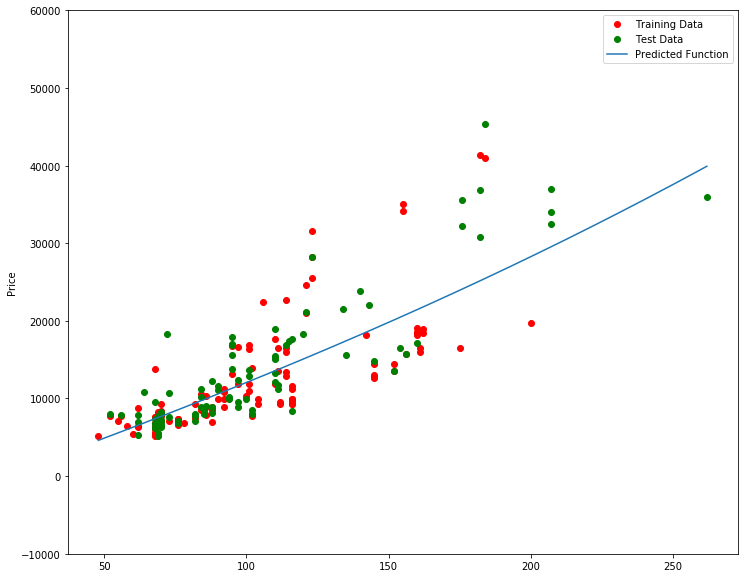

<function __main__.f(order, test_data)>

In [87]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05 ))

In [102]:
pr1 = PolynomialFeatures(degree=2)

In [103]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight','engine-size','highway-mpg']])

In [104]:
x_train[['horsepower', 'curb-weight','engine-size','highway-mpg']].shape

(110, 4)

In [105]:
x_train_pr1.shape

(110, 15)

In [93]:
lmm = LinearRegression()

In [106]:
lmm.fit(x_train_pr1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
yhat_train = lmm.predict(x_train_pr1)
yhat_test = lmm.predict(x_test_pr1)

# Ridge Regression

In [108]:
pr = PolynomialFeatures(degree=2)
x_train_pr =pr.fit_transform(x_train[['horsepower','curb-weight','engine-size', 'highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['horsepower','curb-weight','engine-size', 'highway-mpg']])

In [110]:
from sklearn.linear_model import Ridge
RigeModel = Ridge(alpha=0.1)

In [111]:
RigeModel.fit(x_train_pr, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.05343e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [113]:
yhat = RigeModel.predict(x_test_pr)

In [116]:
RigeModel.score(x_test_pr, y_test)

0.6118275334846717

In [114]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

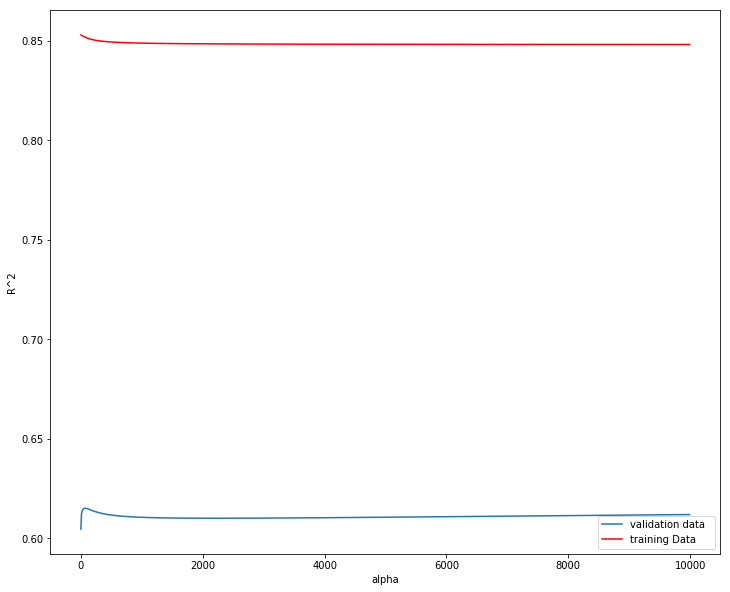

In [115]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

# Grid Search

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameters1 = [{'alpha':[0.001,0.1,0,10,100,1000,10000]}]
parameters1

[{'alpha': [0.001, 0.1, 0, 10, 100, 1000, 10000]}]

In [119]:
RR=Ridge()

In [120]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [121]:
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']], y_data)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 0, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [122]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
BestRR.score(x_test[['horsepower', 'curb-weight','engine-size','highway-mpg']], y_test)

0.8411649831036149